<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week10_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Klasifikasi Machine Learning

Praktikum ini membahas tentang implementasi algoritma klasifikasi menggunakan k-Nearest Neighbors (kNN) dan Naive Bayes dengan Python.

## Praktikum 1: k-Nearest Neighbors (kNN)

### Dataset: Iris Dataset

Dataset Iris adalah dataset klasik dalam machine learning yang berisi pengukuran 150 bunga iris dari 3 spesies berbeda:
- **sepal length**: Panjang sepal dalam cm
- **sepal width**: Lebar sepal dalam cm  
- **petal length**: Panjang petal dalam cm
- **petal width**: Lebar petal dalam cm
- **species**: Spesies bunga (setosa, versicolor, virginica)

### Langkah 1: Load Data

In [1]:
# Load data
import pandas as pd

data = pd.read_csv('iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Penjelasan:** Membaca dataset iris.csv dan menampilkan 5 baris pertama untuk melihat struktur data.

**Analisis Output:** Dataset berisi 4 fitur numerik (sepal length, sepal width, petal length, petal width) dan 1 kolom label kategorikal (species).

### Langkah 2: Eksplorasi Data

In [2]:
# Cek struktur data, informasi deskriptif data
print("Informasi Dataset:")
print(data.info())
print("\n" + "="*50 + "\n")

print("Statistik Deskriptif:")
print(data.describe())
print("\n" + "="*50 + "\n")

print("Distribusi Spesies:")
print(data['species'].value_counts())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%  

**Penjelasan:** Melakukan eksplorasi data untuk memahami struktur, statistik deskriptif, dan distribusi kelas.

**Analisis Output:**
- **info()**: Menampilkan tipe data dan jumlah non-null values
- **describe()**: Statistik seperti mean, std, min, max untuk fitur numerik
- **value_counts()**: Distribusi jumlah sampel per spesies (idealnya seimbang)

### Langkah 3: Visualisasi Data

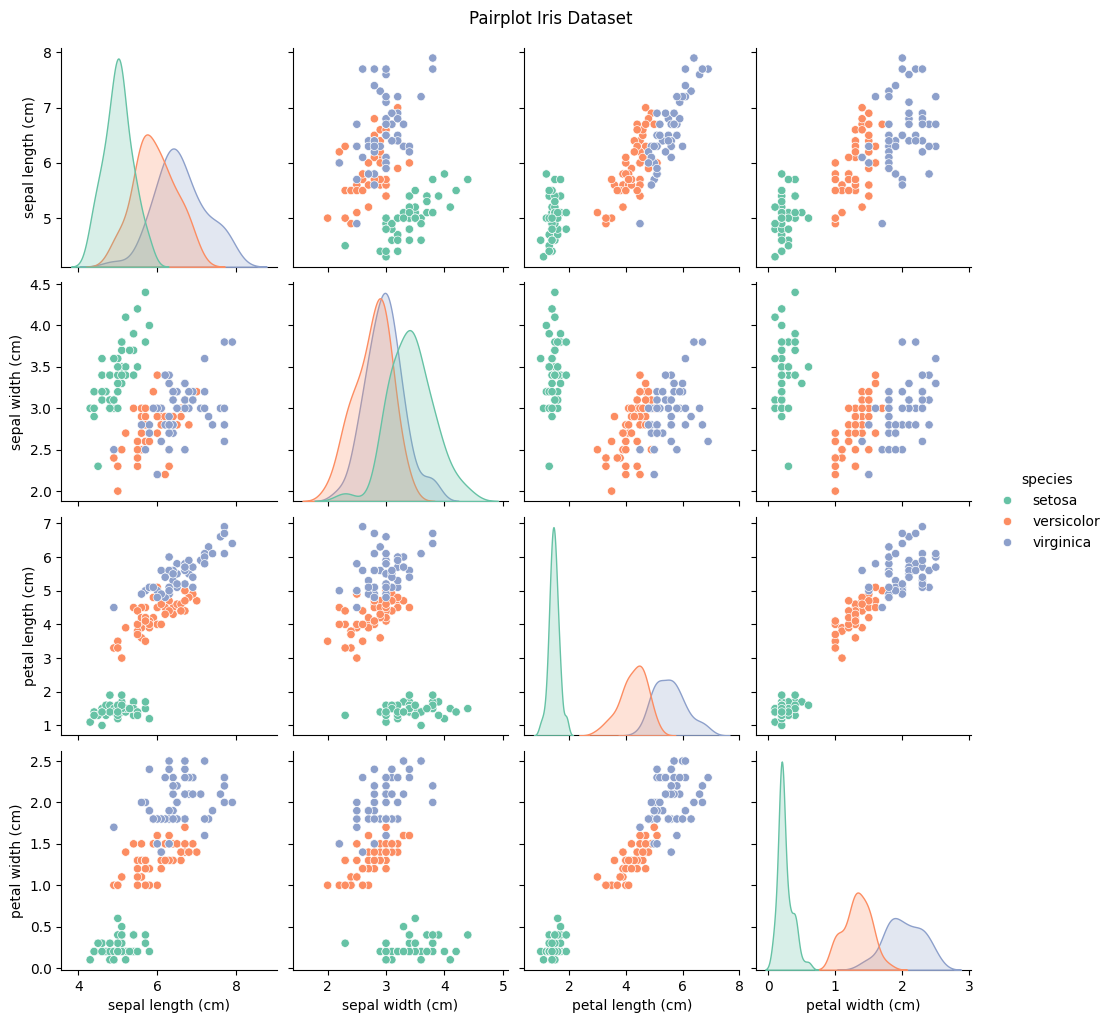

In [3]:
# Visualisasi data untuk mengetahui distribusi dan korelasi setiap fitur terhadap label
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species', palette='Set2')
plt.suptitle('Pairplot Iris Dataset', y=1.02)
plt.show()

**Penjelasan:** Membuat pairplot untuk visualisasi hubungan antar fitur, dengan warna berbeda untuk setiap spesies.

**Analisis Output:** Pairplot menampilkan scatter plot untuk setiap pasangan fitur. Kita dapat melihat:
- Pemisahan antar kelas (spesies)
- Fitur mana yang paling diskriminatif
- Setosa cenderung mudah dipisahkan, sedangkan versicolor dan virginica memiliki overlap

### Langkah 4: Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan label
X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 105
Jumlah data testing: 45


**Penjelasan:** Preprocessing meliputi:
- Pemisahan fitur (X) dan label (y)
- Split data 70:30 untuk training dan testing
- Standardisasi fitur agar memiliki mean=0 dan std=1

**Analisis Output:** Standardisasi penting untuk kNN karena algoritma ini berbasis jarak. Tanpa standardisasi, fitur dengan skala besar akan mendominasi perhitungan jarak.

### Langkah 5: Buat Model kNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

print("Model kNN berhasil dilatih dengan k=3")

Model kNN berhasil dilatih dengan k=3


**Penjelasan:** Membuat model k-Nearest Neighbors dengan parameter k=3, artinya klasifikasi dilakukan berdasarkan mayoritas voting dari 3 tetangga terdekat.

**Analisis Output:** Model kNN tidak menyimpan bobot seperti model lain, melainkan menyimpan seluruh data training untuk digunakan saat prediksi.

### Langkah 6: Evaluasi Model kNN

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("="*60)
print("EVALUASI MODEL kNN (k=3)")
print("="*60)
print(f"\nAkurasi: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nLaporan Klasifikasi:\n{report}")

EVALUASI MODEL kNN (k=3)

Akurasi: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Penjelasan:** Evaluasi model menggunakan metrik:
- **Accuracy**: Persentase prediksi yang benar
- **Confusion Matrix**: Matriks yang menunjukkan prediksi benar dan salah per kelas
- **Classification Report**: Precision, recall, dan f1-score per kelas

**Analisis Output:**
- Akurasi tinggi (biasanya >0.95) menunjukkan model bekerja sangat baik
- Confusion matrix menunjukkan kesalahan klasifikasi antar kelas
- Precision: Seberapa tepat prediksi positif
- Recall: Seberapa lengkap mendeteksi kelas positif

### Langkah 7: Mencari Nilai K Optimal

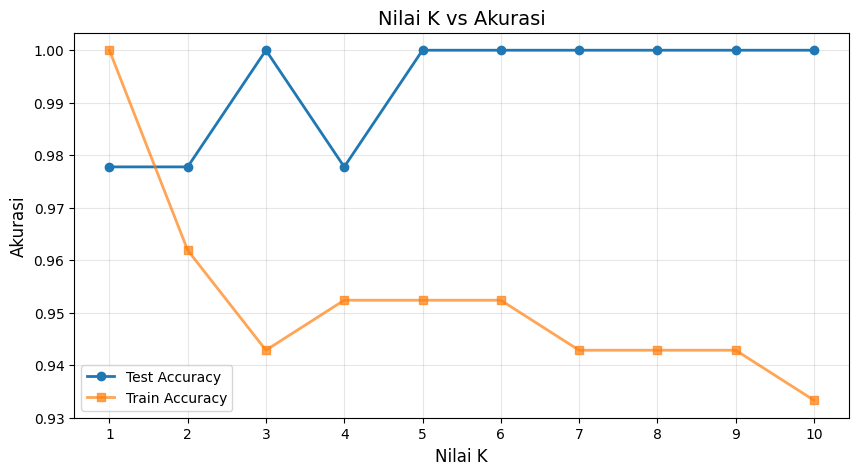


Nilai K terbaik: 3 dengan akurasi test: 1.0000


In [7]:
# Evaluasi untuk berbagai nilai k
acc_train = []
acc_test = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Akurasi training
    acc_train.append(model.score(X_train, y_train))

    # Akurasi testing
    acc_test.append(model.score(X_test, y_test))

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), acc_test, marker='o', label='Test Accuracy', linewidth=2)
plt.plot(range(1, 11), acc_train, marker='s', label='Train Accuracy', linewidth=2, alpha=0.7)
plt.title('Nilai K vs Akurasi', fontsize=14)
plt.xlabel('Nilai K', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))
plt.show()

# Temukan k terbaik
best_k = acc_test.index(max(acc_test)) + 1
print(f"\nNilai K terbaik: {best_k} dengan akurasi test: {max(acc_test):.4f}")

**Penjelasan:** Mengevaluasi performa model untuk k=1 hingga k=10 untuk menemukan nilai k optimal.

**Analisis Output:**
- Grafik menunjukkan trade-off antara bias dan variance
- k kecil: Model lebih kompleks, rentan overfitting (akurasi train tinggi, test rendah)
- k besar: Model lebih sederhana, mungkin underfitting (akurasi train dan test sama-sama rendah)
- k optimal: Keseimbangan antara akurasi training dan testing

## Praktikum 2: Naive Bayes

### Intro

Pada percobaan ini kita akan menggunakan data dummy (sintetis) untuk membuat model Naive Bayes. Data dummy dibuat menggunakan `make_classification` dari scikit-learn. Kita akan membandingkan dua jenis Naive Bayes:
- **Multinomial Naive Bayes**: Untuk data diskrit (e.g., word counts)
- **Gaussian Naive Bayes**: Untuk data kontinu dengan distribusi normal

### Langkah 1: Buat Dataset Dummy

In [8]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X, y = make_classification(n_samples=30, n_features=2, n_classes=2,
                          n_informative=2, n_redundant=0, n_repeated=0,
                          shuffle=False, random_state=42)

# Secara default, make_classification menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit untuk Multinomial NB

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print("Fitur X (5 data pertama):")
print(X[:5])
print("\nLabel y (5 data pertama):")
print(y[:5])

Fitur X (5 data pertama):
[[112 139]
 [179 210]
 [ 83  71]
 [182 265]
 [105  78]]

Label y (5 data pertama):
[0 0 0 0 0]


**Penjelasan:** Membuat dataset sintetis dengan parameter:
- **n_samples**: 30 sampel
- **n_features**: 2 fitur
- **n_classes**: 2 kelas
- **n_informative**: 2 fitur informatif (berkorelasi dengan label)
- **n_redundant**: 0 fitur redundan

**Analisis Output:** Data dikonversi ke integer untuk simulasi data diskrit yang cocok untuk Multinomial Naive Bayes.

### Langkah 2 (Opsional): Membuat DataFrame

In [9]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data_nb = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat DataFrame
df = pd.DataFrame(data_nb, columns=nama_kolom)

# Cek DataFrame
print("Dataset dalam bentuk DataFrame:")
df.head(10)

Dataset dalam bentuk DataFrame:


,Fitur 1,Fitur 2,Label
0,112,139,0
1,179,210,0
2,83,71,0
3,182,265,0
4,105,78,0
5,67,43,0
6,36,54,0
7,20,70,0
8,122,70,1
9,250,83,1


**Penjelasan:** Mengubah array numpy menjadi pandas DataFrame untuk visualisasi data yang lebih mudah dibaca.

**Analisis Output:** DataFrame menampilkan data dalam format tabel yang terstruktur dengan nama kolom yang jelas.

### Langkah 3 (Opsional): Labeling

In [10]:
# Definisikan nama label
labels = {
    1: 'Kelas A',
    0: 'Kelas B'
}

# Copy DataFrame untuk menyimpan DataFrame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada DataFrame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek DataFrame df_label
print("Dataset dengan label kategorikal:")
df_label.head(10)

Dataset dengan label kategorikal:


,Fitur 1,Fitur 2,Label
0,112,139,Kelas B
1,179,210,Kelas B
2,83,71,Kelas B
3,182,265,Kelas B
4,105,78,Kelas B
5,67,43,Kelas B
6,36,54,Kelas B
7,20,70,Kelas B
8,122,70,Kelas A
9,250,83,Kelas A


**Penjelasan:** Mengubah label numerik (0, 1) menjadi label kategorikal ('Kelas A', 'Kelas B') untuk interpretasi yang lebih mudah.

**Analisis Output:** Label sekarang dalam format yang lebih deskriptif dan mudah dipahami.

### Langkah 4: Visualisasi Data

/tmp/ipython-input-2656347717.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2656347717.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


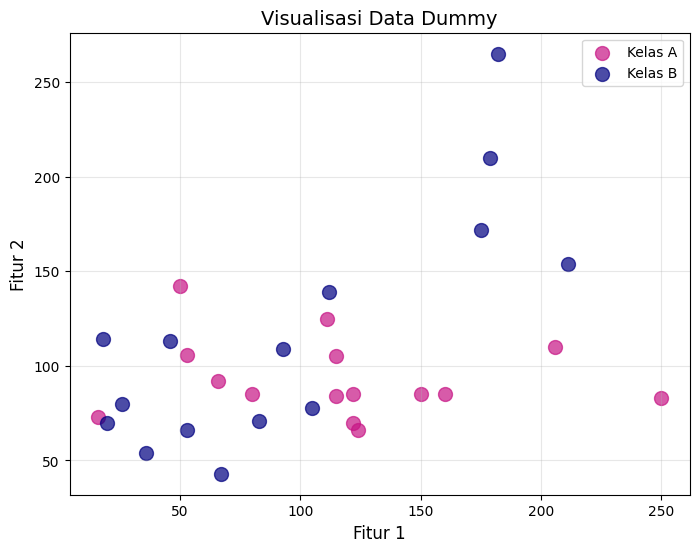

In [11]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'], s=100, alpha=0.7)
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'], s=100, alpha=0.7)
plt.xlabel('Fitur 1', fontsize=12)
plt.ylabel('Fitur 2', fontsize=12)
plt.title('Visualisasi Data Dummy', fontsize=14)
plt.legend(['Kelas A', 'Kelas B'])
plt.grid(True, alpha=0.3)
plt.show()

**Penjelasan:** Membuat scatter plot untuk visualisasi distribusi data dengan warna berbeda untuk setiap kelas.

**Analisis Output:** Scatter plot menunjukkan bagaimana data terdistribusi dalam ruang fitur 2D. Pemisahan yang jelas antara kelas menunjukkan data dapat diklasifikasi dengan baik.

### Langkah 5: Model Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Inisiasi objek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train_nb, y_train_nb)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train_nb)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train_nb, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test_nb)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test_nb, y_test_pred)

# Print hasil evaluasi
print("="*60)
print("EVALUASI MODEL MULTINOMIAL NAIVE BAYES")
print("="*60)
print(f'Hasil akurasi data train: {acc_train:.4f}')
print(f'Hasil akurasi data test: {acc_test:.4f}')

EVALUASI MODEL MULTINOMIAL NAIVE BAYES
Hasil akurasi data train: 0.8095
Hasil akurasi data test: 0.3333


**Penjelasan:** Membuat model Multinomial Naive Bayes yang cocok untuk data diskrit (seperti word counts dalam text classification).

**Analisis Output:**
- Model Multinomial mengasumsikan fitur mengikuti distribusi multinomial
- Akurasi menunjukkan performa model pada data training dan testing
- Catatan: Meskipun tidak ideal untuk data kontinu, ini untuk tujuan pembelajaran

### Langkah 6: Model Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

# Inisiasi objek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
gnb.fit(X_train_nb, y_train_nb)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train_nb)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train_nb, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test_nb)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test_nb, y_test_pred_gnb)

# Print hasil evaluasi
print("="*60)
print("EVALUASI MODEL GAUSSIAN NAIVE BAYES")
print("="*60)
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb:.4f}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb:.4f}')

EVALUASI MODEL GAUSSIAN NAIVE BAYES
Hasil akurasi data train (Gaussian): 0.8571
Hasil akurasi data test (Gaussian): 0.4444


**Penjelasan:** Membuat model Gaussian Naive Bayes yang lebih cocok untuk data kontinu dengan asumsi distribusi normal.

**Analisis Output:**
- Model Gaussian mengasumsikan fitur mengikuti distribusi Gaussian (normal)
- Lebih sesuai untuk data kontinu seperti data asli sebelum dikonversi ke integer
- Perbandingan akurasi dengan Multinomial NB menunjukkan model mana yang lebih cocok

### Perbandingan Model

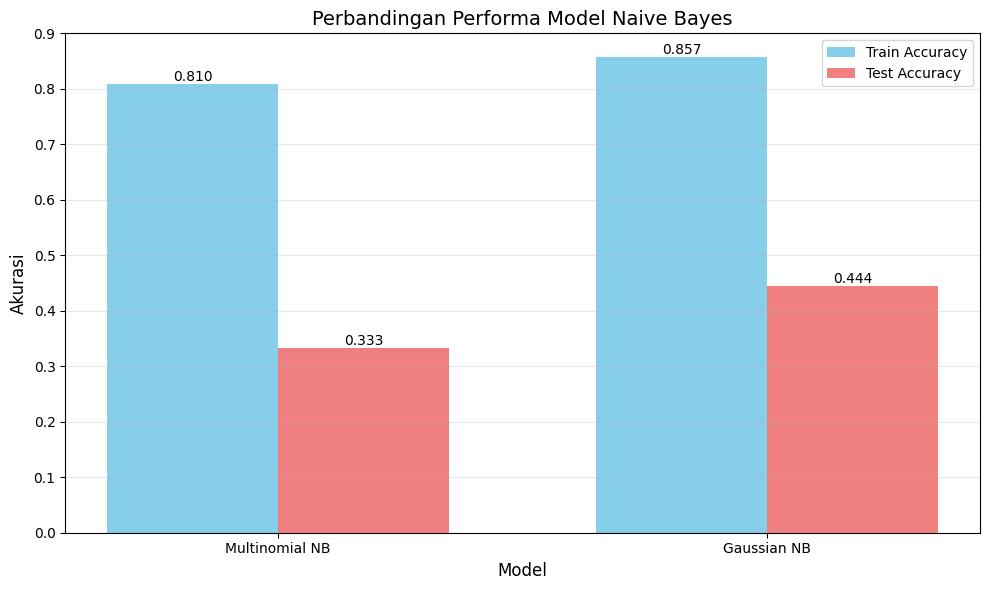


📊 KESIMPULAN PERBANDINGAN:
✓ Gaussian Naive Bayes menunjukkan performa lebih baik
  untuk dataset ini.

Secara teoritis, Gaussian NB lebih sesuai untuk data kontinu,
sedangkan Multinomial NB untuk data diskrit (e.g., word counts).


In [14]:
# Visualisasi perbandingan
models = ['Multinomial NB', 'Gaussian NB']
train_scores = [acc_train, acc_train_gnb]
test_scores = [acc_test, acc_test_gnb]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='lightcoral')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Akurasi', fontsize=12)
ax.set_title('Perbandingan Performa Model Naive Bayes', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n📊 KESIMPULAN PERBANDINGAN:")
print("="*60)
if acc_test_gnb > acc_test:
    print("✓ Gaussian Naive Bayes menunjukkan performa lebih baik")
    print("  untuk dataset ini.")
elif acc_test < acc_test_gnb:
    print("✓ Multinomial Naive Bayes menunjukkan performa lebih baik")
    print("  untuk dataset ini.")
else:
    print("✓ Kedua model menunjukkan performa yang setara.")
print("\nSecara teoritis, Gaussian NB lebih sesuai untuk data kontinu,")
print("sedangkan Multinomial NB untuk data diskrit (e.g., word counts).")

**Penjelasan:** Membuat visualisasi perbandingan performa antara Multinomial dan Gaussian Naive Bayes.

**Analisis Output:** Bar chart memudahkan perbandingan akurasi training dan testing untuk kedua model, membantu memilih model terbaik.

## Tugas Praktikum: Klasifikasi Spam

### Dataset: SMS Spam Collection

Dataset berisi pesan SMS yang dilabeli sebagai spam atau ham (bukan spam). Kita akan menggunakan teknik ekstraksi fitur teks untuk mengubah teks menjadi representasi numerik.

### Tugas 1: Klasifikasi dengan CountVectorizer

#### Langkah 1: Load dan Eksplorasi Data

In [15]:
# Load dataset spam
spam_data = pd.read_csv('spam.csv', encoding='latin-1')

# Pilih kolom yang relevan (biasanya kolom pertama adalah label, kedua adalah teks)
spam_data = spam_data.iloc[:, :2]
spam_data.columns = ['label', 'message']

print("Dataset Shape:", spam_data.shape)
print("\nSampel Data:")
print(spam_data.head(10))
print("\nDistribusi Label:")
print(spam_data['label'].value_counts())

Dataset Shape: (5572, 2)

Sampel Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

Distribusi Label:
label
ham     4825
spam     747
Name: count, dtype: int64


**Penjelasan:** Membaca dataset spam dan melakukan eksplorasi awal untuk memahami struktur data dan distribusi kelas.

**Analisis Output:** Dataset berisi pesan teks dan label (spam/ham). Penting untuk mengecek keseimbangan kelas untuk menghindari bias model.

#### Langkah 2: Preprocessing dengan CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X_spam = spam_data['message']
y_spam = spam_data['label']

# Split data
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=42
)

# CountVectorizer dengan stop_words
vectorizer_count = CountVectorizer(stop_words='english', max_features=3000)

# Transform data
X_train_count = vectorizer_count.fit_transform(X_train_spam)
X_test_count = vectorizer_count.transform(X_test_spam)

print(f"Jumlah fitur (vocabulary): {len(vectorizer_count.vocabulary_)}")
print(f"Shape X_train: {X_train_count.shape}")
print(f"Shape X_test: {X_test_count.shape}")

Jumlah fitur (vocabulary): 3000
Shape X_train: (4457, 3000)
Shape X_test: (1115, 3000)


**Penjelasan:** CountVectorizer mengubah teks menjadi matriks frekuensi kata:
- **stop_words='english'**: Menghilangkan kata-kata umum (the, is, at, dll)
- **max_features=3000**: Membatasi jumlah fitur ke 3000 kata paling sering

**Analisis Output:** Setiap dokumen direpresentasikan sebagai vektor dengan panjang = jumlah kata unik dalam vocabulary. Nilai dalam vektor adalah frekuensi kemunculan kata.

#### Langkah 3: Training Model dengan CountVectorizer

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Buat dan latih model
mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, y_train_spam)

# Prediksi
y_pred_count = mnb_count.predict(X_test_count)

# Evaluasi
acc_count = accuracy_score(y_test_spam, y_pred_count)
cm_count = confusion_matrix(y_test_spam, y_pred_count)
report_count = classification_report(y_test_spam, y_pred_count)

print("="*70)
print("EVALUASI MODEL: MULTINOMIAL NB + COUNTVECTORIZER")
print("="*70)
print(f"\n📊 Akurasi: {acc_count:.4f} ({acc_count*100:.2f}%)")
print(f"\n📋 Confusion Matrix:\n{cm_count}")
print(f"\n📈 Classification Report:\n{report_count}")

EVALUASI MODEL: MULTINOMIAL NB + COUNTVECTORIZER

📊 Akurasi: 0.9830 (98.30%)

📋 Confusion Matrix:
[[958   7]
 [ 12 138]]

📈 Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.95      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Penjelasan:** Melatih model Multinomial Naive Bayes menggunakan fitur CountVectorizer dan mengevaluasi performanya.

**Analisis Output:**
- **Akurasi**: Persentase prediksi yang benar secara keseluruhan
- **Confusion Matrix**: Menunjukkan True Positive, True Negative, False Positive, False Negative
- **Precision**: Dari semua yang diprediksi spam, berapa yang benar-benar spam
- **Recall**: Dari semua spam sebenarnya, berapa yang berhasil terdeteksi

### Tugas 2: Klasifikasi dengan TF-IDF

#### Langkah 1: Preprocessing dengan TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer dengan stop_words
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Transform data (menggunakan split yang sama)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train_spam)
X_test_tfidf = vectorizer_tfidf.transform(X_test_spam)

print(f"Jumlah fitur (vocabulary): {len(vectorizer_tfidf.vocabulary_)}")
print(f"Shape X_train: {X_train_tfidf.shape}")
print(f"Shape X_test: {X_test_tfidf.shape}")

Jumlah fitur (vocabulary): 3000
Shape X_train: (4457, 3000)
Shape X_test: (1115, 3000)


**Penjelasan:** TF-IDF (Term Frequency-Inverse Document Frequency) memberikan bobot pada kata:
- **TF**: Seberapa sering kata muncul dalam dokumen
- **IDF**: Seberapa unik kata tersebut di seluruh corpus
- Kata yang sering muncul di banyak dokumen mendapat bobot rendah

**Analisis Output:** TF-IDF menghasilkan nilai real (bukan integer seperti CountVectorizer), memberikan representasi yang lebih informatif tentang pentingnya kata.

#### Langkah 2: Training Model dengan TF-IDF

In [19]:
# Buat dan latih model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train_spam)

# Prediksi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluasi
acc_tfidf = accuracy_score(y_test_spam, y_pred_tfidf)
cm_tfidf = confusion_matrix(y_test_spam, y_pred_tfidf)
report_tfidf = classification_report(y_test_spam, y_pred_tfidf)

print("="*70)
print("EVALUASI MODEL: MULTINOMIAL NB + TF-IDF")
print("="*70)
print(f"\n📊 Akurasi: {acc_tfidf:.4f} ({acc_tfidf*100:.2f}%)")
print(f"\n📋 Confusion Matrix:\n{cm_tfidf}")
print(f"\n📈 Classification Report:\n{report_tfidf}")

EVALUASI MODEL: MULTINOMIAL NB + TF-IDF

📊 Akurasi: 0.9785 (97.85%)

📋 Confusion Matrix:
[[965   0]
 [ 24 126]]

📈 Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



**Penjelasan:** Melatih model yang sama tetapi dengan fitur TF-IDF untuk melihat pengaruh representasi fitur yang berbeda.

**Analisis Output:** Membandingkan metrik evaluasi dengan model CountVectorizer untuk menentukan mana yang lebih baik untuk dataset spam ini.

### Perbandingan dan Kesimpulan

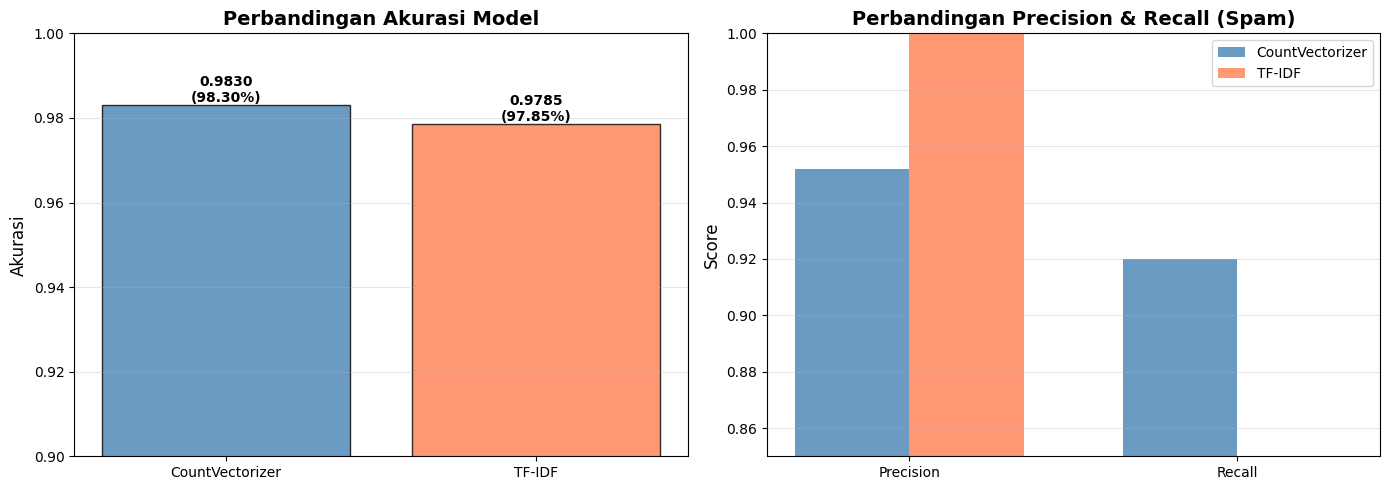


📝 KESIMPULAN PERBANDINGAN

1️⃣ COUNTVECTORIZER:
   - Akurasi: 0.9830 (98.30%)
   - Precision (Spam): 0.9517
   - Recall (Spam): 0.9200
   - Kelebihan: Sederhana, cepat, interpretable
   - Kekurangan: Tidak mempertimbangkan kepentingan kata

2️⃣ TF-IDF:
   - Akurasi: 0.9785 (97.85%)
   - Precision (Spam): 1.0000
   - Recall (Spam): 0.8400
   - Kelebihan: Memberikan bobot pada kata penting
   - Kekurangan: Sedikit lebih kompleks

🏆 PEMENANG: CountVectorizer
   CountVectorizer lebih baik dengan selisih 0.45% akurasi

💡 REKOMENDASI:
   Gunakan CountVectorizer untuk klasifikasi spam karena:
   - Lebih sederhana dan cepat
   - Sudah memberikan hasil yang baik
   - Lebih mudah di-interpret


In [20]:
# Visualisasi Perbandingan
import matplotlib.pyplot as plt
import numpy as np

methods = ['CountVectorizer', 'TF-IDF']
accuracies = [acc_count, acc_tfidf]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Akurasi
bars = ax1.bar(methods, accuracies, color=['steelblue', 'coral'], alpha=0.8, edgecolor='black')
ax1.set_ylabel('Akurasi', fontsize=12)
ax1.set_title('Perbandingan Akurasi Model', fontsize=14, fontweight='bold')
ax1.set_ylim([0.9, 1.0])
ax1.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}\n({acc*100:.2f}%)',
            ha='center', va='bottom', fontweight='bold')

# Plot 2: Confusion Matrix Comparison
x = np.arange(2)
width = 0.35

# Ekstrak metrik dari confusion matrix
# Asumsi: cm = [[TN, FP], [FN, TP]]
tn_count, fp_count, fn_count, tp_count = cm_count.ravel()
tn_tfidf, fp_tfidf, fn_tfidf, tp_tfidf = cm_tfidf.ravel()

precision_count = tp_count / (tp_count + fp_count) if (tp_count + fp_count) > 0 else 0
recall_count = tp_count / (tp_count + fn_count) if (tp_count + fn_count) > 0 else 0
precision_tfidf = tp_tfidf / (tp_tfidf + fp_tfidf) if (tp_tfidf + fp_tfidf) > 0 else 0
recall_tfidf = tp_tfidf / (tp_tfidf + fn_tfidf) if (tp_tfidf + fn_tfidf) > 0 else 0

metrics_count = [precision_count, recall_count]
metrics_tfidf = [precision_tfidf, recall_tfidf]

bars1 = ax2.bar(x - width/2, metrics_count, width, label='CountVectorizer', color='steelblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, metrics_tfidf, width, label='TF-IDF', color='coral', alpha=0.8)

ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Perbandingan Precision & Recall (Spam)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['Precision', 'Recall'])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

# Kesimpulan
print("\n" + "="*70)
print("📝 KESIMPULAN PERBANDINGAN")
print("="*70)

print("\n1️⃣ COUNTVECTORIZER:")
print(f"   - Akurasi: {acc_count:.4f} ({acc_count*100:.2f}%)")
print(f"   - Precision (Spam): {precision_count:.4f}")
print(f"   - Recall (Spam): {recall_count:.4f}")
print("   - Kelebihan: Sederhana, cepat, interpretable")
print("   - Kekurangan: Tidak mempertimbangkan kepentingan kata")

print("\n2️⃣ TF-IDF:")
print(f"   - Akurasi: {acc_tfidf:.4f} ({acc_tfidf*100:.2f}%)")
print(f"   - Precision (Spam): {precision_tfidf:.4f}")
print(f"   - Recall (Spam): {recall_tfidf:.4f}")
print("   - Kelebihan: Memberikan bobot pada kata penting")
print("   - Kekurangan: Sedikit lebih kompleks")

print("\n" + "="*70)
if acc_tfidf > acc_count:
    diff = (acc_tfidf - acc_count) * 100
    print(f"🏆 PEMENANG: TF-IDF")
    print(f"   TF-IDF lebih baik dengan selisih {diff:.2f}% akurasi")
elif acc_count > acc_tfidf:
    diff = (acc_count - acc_tfidf) * 100
    print(f"🏆 PEMENANG: CountVectorizer")
    print(f"   CountVectorizer lebih baik dengan selisih {diff:.2f}% akurasi")
else:
    print("🤝 HASILNYA SETARA")
    print("   Kedua metode memberikan performa yang sama")

print("\n💡 REKOMENDASI:")
if acc_tfidf >= acc_count:
    print("   Gunakan TF-IDF untuk klasifikasi spam karena:")
    print("   - Memberikan bobot lebih pada kata-kata diskriminatif")
    print("   - Mengurangi pengaruh kata yang terlalu umum")
    print("   - Lebih robust untuk text classification")
else:
    print("   Gunakan CountVectorizer untuk klasifikasi spam karena:")
    print("   - Lebih sederhana dan cepat")
    print("   - Sudah memberikan hasil yang baik")
    print("   - Lebih mudah di-interpret")
print("="*70)

**Penjelasan:** Membuat visualisasi komprehensif dan kesimpulan dari perbandingan kedua metode feature extraction.

**Analisis Output:**
- **Bar Chart Akurasi**: Menampilkan perbandingan langsung akurasi kedua metode
- **Precision & Recall**: Metrik penting untuk imbalanced classification
- **Kesimpulan**: Berdasarkan data, memberikan rekomendasi metode terbaik

**Catatan Penting:**
- TF-IDF umumnya lebih baik untuk text classification karena memberikan bobot pada kata penting
- CountVectorizer lebih sederhana dan bisa cukup baik untuk dataset tertentu
- Selalu pertimbangkan trade-off antara performa dan kompleksitas

## 📚 Kesimpulan Praktikum

### Praktikum 1: k-Nearest Neighbors
- ✅ kNN adalah algoritma lazy learning yang tidak memiliki fase training eksplisit
- ✅ Pemilihan nilai k sangat penting untuk performa model
- ✅ Standardisasi fitur penting karena kNN berbasis jarak
- ✅ Dataset Iris menunjukkan hasil sangat baik (akurasi >95%)

### Praktikum 2: Naive Bayes
- ✅ Multinomial NB cocok untuk data diskrit (word counts)
- ✅ Gaussian NB cocok untuk data kontinu (distribusi normal)
- ✅ Naive Bayes cepat dan efisien untuk dataset besar
- ✅ Asumsi independence antar fitur adalah simplifikasi yang powerful

### Tugas: Klasifikasi Spam
- ✅ TF-IDF umumnya lebih baik daripada CountVectorizer
- ✅ Stop words removal meningkatkan performa
- ✅ Naive Bayes sangat efektif untuk text classification
- ✅ Feature engineering sangat penting dalam NLP

### Pembelajaran Penting:
1. **Pemilihan Algoritma**: Bergantung pada karakteristik data
2. **Preprocessing**: Sangat mempengaruhi hasil akhir
3. **Evaluasi**: Gunakan multiple metrics, tidak hanya akurasi
4. **Hyperparameter Tuning**: Penting untuk optimalisasi model